# Running Window diffusion coefficient

## Nocodazole Treatment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import filedialog

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label_files (file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
        df['logD'] = np.log10(df['D'])
        df = df [df['R2'] > 0]
    return pd.concat(dfs)

In [4]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'No drug_2x')
df_condition2 = load_and_label_files(csv_files_2, 'Nocodazole_30 mins')
df_condition3 = load_and_label_files(csv_files_3, 'Nocodazole_60 mins')

In [5]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

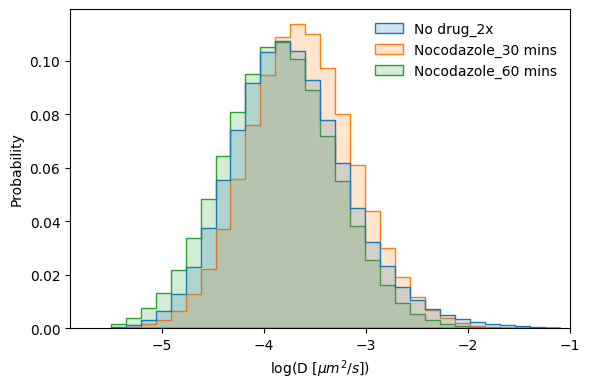

In [13]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=df_combined,
    x='logD',
    hue='Condition',
    bins=30,
    binrange = (-5.5,-1.1),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlabel('log(D [$\mu m^2/s$])')
plt.ylabel('Probability')
plt.xlim(-5.9, -1) 
plt.tight_layout()
plt.show()

## LatrunculinA Treatment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import filedialog

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def load_and_label_files (file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
        df['logD'] = np.log10(df['D'])
        df = df [df['R2'] > 0]
    return pd.concat(dfs)

In [4]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'No drug_2x')
df_condition2 = load_and_label_files(csv_files_2, 'LarunculinA_30 mins')
df_condition3 = load_and_label_files(csv_files_3, 'LatrunculinA_60 mins')

In [5]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

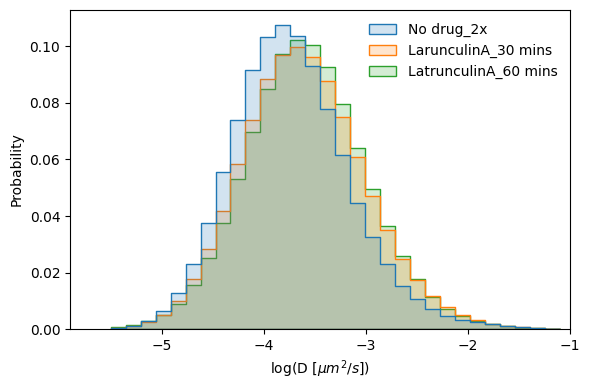

In [6]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=df_combined,
    x='logD',
    hue='Condition',
    bins=30,
    binrange = (-5.5,-1.1),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlabel('log(D [$\mu m^2/s$])')
plt.ylabel('Probability')
plt.xlim(-5.9, -1) 
plt.tight_layout()
plt.show()